In [1]:
import hdf5plugin
import h5py
import cupy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
FILENAME = "data/blc41_guppi_59103_01372_PSR_B2021+51_0009.rawspec.0000.h5"

In [3]:
f = h5py.File(FILENAME, "r")
data = f["data"]
data.shape

(16, 1, 67108864)

In [4]:
data[0, 0, 0]

15226.765

(16, 100)


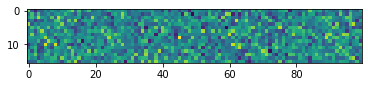

In [5]:
c = cupy.asarray(data[:, 0, :100])
print(c.shape)
plt.imshow(c.get())

In [6]:
c = cupy.asarray(data[:, 0, :])

In [7]:
cupy.amax(c).item()

5737905664.0

In [8]:
cmax = cupy.max(c, axis=0) # max of each column

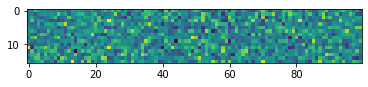

In [16]:
n = 7000000
plt.imshow(c[:, n:n+100].get())

In [18]:
dict(data.attrs)

{'DIMENSION_LABELS': array(['time', 'feed_id', 'frequency'], dtype=object),
 'az_start': 0.0,
 'data_type': 1,
 'fch1': 2063.96484375,
 'foff': -2.7939677238464355e-06,
 'ibeam': -1,
 'machine_id': 20,
 'nbeams': 1,
 'nbits': 32,
 'nchans': 67108864,
 'nifs': 1,
 'rawdatafile': 'guppi_59103_01372_PSR_B2021+51_0009.0000.raw',
 'source_name': 'PSR_B2021+51',
 'src_dej': 51.9137,
 'src_raj': 20.3806,
 'telescope_id': 6,
 'tsamp': 18.253611007999982,
 'tstart': 59103.01587962963,
 'za_start': 0.0}